<a href="https://colab.research.google.com/github/SarthV/Machine-Learning-with-Python/blob/master/Twitter-%20Sentiment%20Analysis/Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import re
import nltk
import string
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from google.colab import drive
pd.set_option("display.max_colwidth", 200) 
from PIL import Image
import wordcloud
from wordcloud import WordCloud, STOPWORDS

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [0]:
test = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Twitter Analytics/test_tweets_anuFYb8.csv")
train = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Twitter Analytics/train_E6oV3lV.csv")

In [0]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [0]:
train[train['label'] == 1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia


(array([29720.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  2242.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

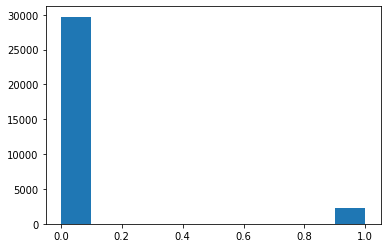

In [0]:
plt.hist(train['label'])

Too many non racist tweets! That's a relief for now. <br/>
But this imbalance distribution is actually not that helpful for us to make Sentiment Analysis.



(array([1.011e+03, 2.957e+03, 4.261e+03, 4.956e+03, 7.507e+03, 6.867e+03,
        3.362e+03, 9.920e+02, 3.400e+01, 9.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00]),
 array([ 11.        ,  28.53333333,  46.06666667,  63.6       ,
         81.13333333,  98.66666667, 116.2       , 133.73333333,
        151.26666667, 168.8       , 186.33333333, 203.86666667,
        221.4       , 238.93333333, 256.46666667, 274.        ]),
 <a list of 15 Patch objects>)

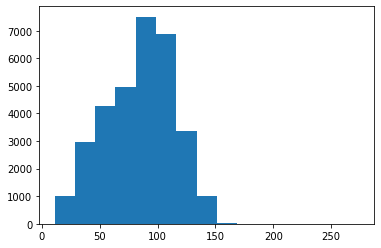

In [0]:
len_train = train['tweet'].str.len()
plt.hist(len_train, bins=15)

In [0]:
combined = train.append(test, ignore_index= True)
combined.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation


In [0]:
combined['cleaned tweet'] = combined['tweet'].str.replace("@[\w]*", "")

In [0]:
combined.head()

,id,label,tweet,cleaned tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


We removed "@user" part from the tweet but we still need to remove other characters from the tweets.


In [0]:
combined['cleaned tweet'] = combined['cleaned tweet'].str.replace("[^a-zA-Z#]", " ") ## We do not replace the hashtags here! Note the # symbol inside the square braces.
combined.head(10)

,id,label,tweet,cleaned tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can t use cause they don t offer wheelchair vans in pdx #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in ur
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fan fare and big talking before they leave chaos and pay disputes when they get there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,the next school year is the year for exams can t think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,we won love the land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here i m it s so #gr


***Now, to make the text analysis more useful, we will now try to eradicate/ remove all the words with 2 or less than 2 letters from all the reviews in the dataset.***

In [0]:
def removeShort(tweetList):
  newlist = [" ".join(w for w in p.split() if len(w) > 3) for p in tweetList] 
  return newlist

In [0]:
from pandas import DataFrame

In [0]:
newlist = removeShort(combined['cleaned tweet'])
newdf = DataFrame(newlist, columns=['cleantweet'])

Here we need to be careful now. **Note that the function removeShort returns a list where as our "combined" table is dataframe.** Thus, here we define a newlist which is a list containing all the tweets with the short words removed.  Next we convert this list into a datframe and replace the 'cleaned twwets' colums in the combined dataframe by this newly formed datframe from newlist i.e. newdf. 

In [0]:
newdf.head()

,cleantweet
0,when father dysfunctional selfish drags kids into dysfunction #run
1,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,bihday your majesty
3,#model love take with time
4,factsguide society #motivation


In [0]:
combined['cleaned tweet'] = newdf['cleantweet']

In [0]:
combined.head(10)

,id,label,tweet,cleaned tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fare talking before they leave chaos disputes when they there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,next school year year exams think about that #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,love land #allin #cavs #champions #cleveland #clevelandcavaliers
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcome here


In [0]:
## Tokenization : creating a bag of words model.
tokenized_tweet = combined['cleaned tweet'].apply(lambda x : x.split())

In [0]:
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: cleaned tweet, dtype: object

In [0]:
## Using NLTK  library's Stemmer which is very similar to Lemmatization that we had performed in the previous code i.e. Topic Modelling.ipynb.
## You may refer the same for more understanding.
from nltk.stem.porter import * 

In [0]:
ps = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x : [ps.stem(i) for i in x])

In [0]:
## Joining these split words back to for the newly cleaned tweet
for i in range(len(tokenized_tweet)):
  tokenized_tweet[i] = " ".join(tokenized_tweet[i])

In [0]:
tokenized_tweet.head()


0                  when father dysfunct selfish drag kid into dysfunct #run
1    thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2                                                       bihday your majesti
3                                                #model love take with time
4                                                  factsguid societi #motiv
Name: cleaned tweet, dtype: object

In [0]:
combined['cleaned tweet'] = tokenized_tweet

In [0]:
combined.head(10)

,id,label,tweet,cleaned tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunct selfish drag kid into dysfunct #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thank #lyft credit caus they offer wheelchair van #disapoint #getthank
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv
5,6,0.0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo,huge fare talk befor they leav chao disput when they there #allshowandnogo
6,7,0.0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦,camp tomorrow danni
7,8,0.0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl,next school year year exam think about that #school #exam #hate #imagin #actorslif #revolutionschool #girl
8,9,0.0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦,love land #allin #cav #champion #cleveland #clevelandcavali
9,10,0.0,@user @user welcome here ! i'm it's so #gr8 !,welcom here


As earlier, we will explore the most commonly used words in all of the tweets witth the help of wordcloud.

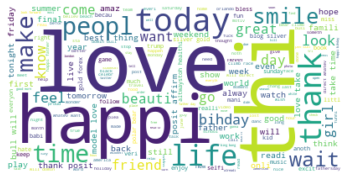

In [0]:
temp_text = " ".join(i for i in combined['cleaned tweet'])
wordcloud = WordCloud(background_color= "white").generate(temp_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

We will now also visualize the tweets according to their categories, i.e. racist and non racist.

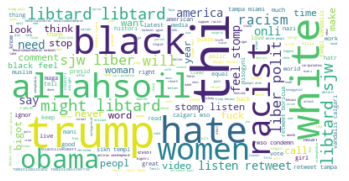

In [0]:
temp_text_racist = " ".join(i for i in combined['cleaned tweet'][combined['label'] == 1])
wordcloud = WordCloud(background_color= "white").generate(temp_text_racist)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Well, certainly not surprised to see Trump's name in bold over here.

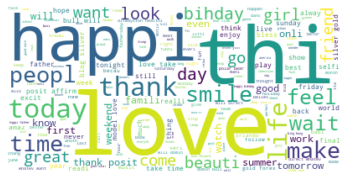

In [0]:
temp_text_not = " ".join(i for i in combined['cleaned tweet'][combined['label'] == 0])
wordcloud = WordCloud(background_color= "white").generate(temp_text_not)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In the end,<br/> ***Love always comes first  :)***

In [0]:
#Hashtags scene!
def extract_hash(tweetlist):
  hashtag = []
  for tweets in tweetlist:
    ht = re.findall(r"#(\w+)", tweets);
    hashtag.append(ht)
  return hashtag    

In [0]:
ht = extract_hash(combined['cleaned tweet'])

In [0]:
for i in range(10):
  print(ht[i]) ## help debug

['run']
['lyft', 'disapoint', 'getthank']
[]
['model']
['motiv']
['allshowandnogo']
[]
['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl']
['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali']
[]


In [0]:
racist_hash = extract_hash(combined['cleaned tweet'][combined['cleaned tweet'] == 1])
non_racist_hash = extract_hash(combined['cleaned tweet'][combined['cleaned tweet'] == 0])

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer 
import gensim

Bag of words model and document term (dt) matrix.
Here we use CountVectorizer to create a document term matrix.  To understand the different parameters of this function I highly ***recommend*** to read this excellent blog: https://kavita-ganesan.com/how-to-use-countvectorizer/#.XqgfLWgzbBU <br/>
Also the default tokenization in CountVectorizer removes all special characters, punctuation and single characters!

In [0]:
cv = CountVectorizer( max_df= 0.88, min_df=2, stop_words='english', max_features= 1100)
bow = cv.fit_transform(combined['cleaned tweet'])

In [0]:
cv.vocabulary_

{'father': 338,
 'kid': 523,
 'run': 823,
 'thank': 972,
 'caus': 146,
 'offer': 669,
 'bihday': 89,
 'model': 623,
 'love': 580,
 'time': 982,
 'societi': 883,
 'motiv': 633,
 'huge': 475,
 'talk': 951,
 'befor': 79,
 'leav': 546,
 'camp': 136,
 'tomorrow': 988,
 'school': 835,
 'year': 1092,
 'exam': 314,
 'think': 977,
 'hate': 440,
 'imagin': 487,
 'girl': 395,
 'land': 534,
 'cav': 147,
 'welcom': 1064,
 'ireland': 507,
 'price': 747,
 'climb': 173,
 'previou': 746,
 'blog': 99,
 'silver': 864,
 'gold': 403,
 'forex': 368,
 'orlando': 683,
 'orlandoshoot': 684,
 'heabreak': 444,
 'valu': 1028,
 'daddi': 230,
 'today': 985,
 'day': 237,
 'build': 130,
 'wall': 1047,
 'comment': 190,
 'angri': 37,
 'posit': 733,
 'retweet': 807,
 'agre': 19,
 'friday': 376,
 'smile': 878,
 'make': 592,
 'peopl': 701,
 'know': 531,
 'euro': 305,
 'blame': 95,
 'goal': 400,
 'gave': 389,
 'away': 63,
 'free': 373,
 'kick': 522,
 'littl': 565,
 'dude': 280,
 'cat': 144,
 'funni': 384,
 'laugh': 538,
 '

TF-IDF: basically returns a matrix similar like the dt matrix but has vaules of the respective tf-idf scores.
 Creating a TF-IDF matrix is very similar to that of a dt matrix. We can also change a dt matrix into a TF-IDF one by using the TfidfTransformer.
TF-IDF is a scoring system which gives more weight/ score to rare words appearing in good numbers in few of the documents. With this, 
it also penalises very frequently occuring words in the corpus. This is all possible because of the log(IDF) term in its calculations. 


In [0]:
tfidfvec = TfidfVectorizer(max_df= 0.88, min_df=2, max_features=1100)
tfidf = tfidfvec.fit_transform(combined['cleaned tweet'])

With this we have a bag of words model i.e. a dt matrix and a TF-IDF model/ matrix with us to work with.
Although these two are good for performing sentiment analysis, there is another method which can help us here, and that is word embedding. <br/>
####***Word Embedding is the conversion of words to vectors. The reason for this transformation is so that machine learning algorithm can perform linear algebra operations on numbers (in vectors) instead of words***

In [0]:
tokenized_tweet = combined['cleaned tweet'].apply(lambda x : x.split())
w2vModel = gensim.models.Word2Vec(tokenized_tweet, size=200,window=5,min_count=2, sg=1, hs = 0, negative = 10, workers= 2, seed = 34) 

In [0]:
w2vModel.train(tokenized_tweet, total_examples=len(combined['cleaned tweet']), epochs = 20)

(6509975, 7535460)

In [0]:
w2vModel.wv.most_similar(positive='dinner')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('cookout', 0.5627826452255249),
 ('#avocado', 0.5626529455184937),
 ('spaghetti', 0.5615538358688354),
 ('#biall', 0.5465629696846008),
 ('#cellar', 0.5458632707595825),
 ('burrito', 0.5425111055374146),
 ('noodl', 0.5420830249786377),
 ('#foodcoma', 0.5351725816726685),
 ('dess', 0.532442033290863),
 ('fav', 0.5313172340393066)]

In [0]:
## Taking mean of all words in a tweet.
def tweet_vector(tweet, size ):
  vec = np.zeros(size).reshape((1, size))
  count = 0
  for word in tweet:
    try:
      vec = vec + w2vModel[word].reshape((1,size))
      count += 1
    except KeyError:
      continue
  if count != 0:
    vec /= count

  return vec  

In [0]:
wordvec_array = np.zeros((len(tokenized_tweet), 200))
for i in range(len(tokenized_tweet)):
  wordvec_array[i] = tweet_vector(tokenized_tweet[i], 200)

In [0]:
word_vec_df = pd.DataFrame(wordvec_array)

In [0]:
word_vec_df.shape

(49159, 200)

Logistic Regression